# Доверительные инетрвалы и непараметрические критерии

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import scipy
import tqdm
from scipy import stats
import random

from IPython.display import *

### <img width = '1200px' src="images/scheme.png">

### 1. Доверительные интервалы

Проверка гипотез - качественная оценка, с помощью доверительных интервалов можем получить количественную оценку.

В математической статистике **доверительный интервал** - интервал, в пределах которого с заданной вероятностью лежат выборочные оценки статистических характеристик генеральной совокупности.

#### Доверительный интервал для среднего

Рассмотрим асимптотический критерий Z, который рассчитывался по формуле: 

 $  \large Z = \frac{\bar {X} - \mu}{ \frac{S}{\sqrt{n}}  } $ ~  $N(0,1)$ при верной $H_0$,
 
 $ \large P (-Z_{1 - \frac{\alpha}{2}} \le \frac{\bar {X} - \mu}{ \frac{S}{\sqrt{n}}  } \le Z_{1 - \frac{\alpha}{2}}) = 1 - \alpha $

Видоизменив формулу, можно получить формулу доверительного интервала для среднего:

 $ \large P (\bar {X} -Z_{1 - \frac{\alpha}{2}} \frac{S}{\sqrt{n} }  \le \mu \le \bar {X}  + Z_{1 - \frac{\alpha}{2}}\frac{S}{\sqrt{n} } ) = 1 - \alpha $

Приводя k-процентный доверительный интервал среднего, мы утверждаем, что вероятность того, что истинное среднее находится в этом интервале, равна k. Иными словами, если получить все возможные выборки из некоторой совокупности и для каждой рассчитать k-процентный доверительный интервал, то доля интервалов, содержащих среднее по совокупности (истинное среднее), составит k.

Аналогично можно получить формулы для доверительных интервалов среднего с небольшим числом наблюдений и известной дисперсией:

 $ \large P (\bar {X} -Z_{1 - \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n} }  \le \mu \le \bar {X}  + Z_{1 - \frac{\alpha}{2}}\frac{\sigma}{\sqrt{n} } ) = 1 - \alpha $

также с использованием t-критерия для оценки по выборке с неизвестной дисперсией и небольшим числом наблюдений:

 $ \large P (\bar {X} -t_{1 - \frac{\alpha}{2}} \frac{S}{\sqrt{n} }  \le \mu \le \bar {X}  + t_{1 - \frac{\alpha}{2}}\frac{S}{\sqrt{n} } ) = 1 - \alpha $

**Задача**

Необходимо найти доверительный интервал для времени доставки заказа курьерами. 

In [265]:
sample = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]

**Решение задачи**

Установим уровень значимости α = 5%.

In [266]:
import statsmodels.stats.api as sms
t = sms.DescrStatsW(sample)
t.tconfint_mean(alpha=0.05, alternative='two-sided')

(30.088604935631402, 37.51139506436859)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

То есть, с 95% вероятностью можно утверждать, что время доставки будет от 30 до 38 минут.

#### Доверительный интервал для разности средних

Рассмотрим критерий Стьюдента t для оценки разности выборочных средних.

Для случайных выборок, извлеченных из одной совокупности, распределение всех возможных значений t (распределение Стьюдента) симметрично относительно среднего, равного нулю. Если же выборки извлечены из двух совокупностей с разными средними, то распределение всех возможных значений t будет иметь среднее, отличное от нуля. Формулу для t можно видоизменить так, чтобы распределение t было всегда симметрично относительно нуля:

$  \large t  = \frac{\overline{X}-\overline{Y} - (\mu_x - \mu_y)} 
{ \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} } } $

Отсюда можно вывести формулу доверительного интервала для оценки разности средних:

$ (\overline{X}-\overline{Y}) - t(n_x + n_y - 2)_{ \frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + t(n_x + n_y - 2)_{\frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} } $

 $  P (  (\overline{X}-\overline{Y}) - t(n_x + n_y - 2)_{ \frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + t(n_x + n_y - 2)_{\frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }) = 1 - \alpha $

По аналогии оцениваются прочие двувыборочные критерии для разных случаев:

1. асимптотический при большом числе наблюдений

 $  P (  (\overline{X}-\overline{Y}) - z_{ \frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + z_{\frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }) = 1 - \alpha $

2. известны дисперсии генеральной совокупности

 $  P (  (\overline{X}-\overline{Y}) - z_{ \frac{\alpha}{ 2}} \sqrt{ \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + z_{\frac{\alpha}{ 2}} \sqrt{ \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y} }) = 1 - \alpha $

3. неизвестны дисперсии генеральной совокупности, известно только, что они равны 

 $  P (  (\overline{X}-\overline{Y}) - t(n_x + n_y - 2)_{ \frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + t(n_x + n_y - 2)_{\frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }) = 1 - \alpha $

4. неизвестны дисперсии и они могут быть не равны

 $  P (  (\overline{X}-\overline{Y}) - t(d)_{ \frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }  < \mu_x - \mu_y <  (\overline{X}-\overline{Y}) + t(d)_{\frac{\alpha}{ 2}} \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} }) = 1 - \alpha $
 
 $ d = \large \frac{(\frac{S^2_x}{n_x} + \frac{S^2_y}{n_y})^2} 
{\frac{S^4_x}{n_x^2(n_x - 1)} + \frac{S^4_y}{n_y^2(n_y - 1)} }$

Для средних из зависимых выборок (наблюдаем изменения
на одних и тех же объектах) работают те же самые
доверительные интервалы, что и для одновыборочных средних.

**Задача**

Необходимо найти доверительный интервал разности времени доставки заказов курьерами на велосипедах и на самокатах.

**Решение задачи**

Установим уровень значимости α = 5%.

In [17]:
sample_vel = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_sam = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]

In [40]:
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(sample_vel), 
                      sms.DescrStatsW(sample_sam))
cm.tconfint_diff(usevar='unequal')

(-9.688119825698426, -0.558546840968245)

C 95% вероятностью можно утверждать, что доставка заказов на велосипеде быстрее, чем на самокате от 10 до 1 минуты.

#### Доверительный интервал для долей

1. для доли

 $  P (  p_0 - z_{ \frac{\alpha}{ 2}} \sqrt{ \frac{p_0(1 - p_0)}{n}}  < p< p_0 + z_{\frac{\alpha}{ 2}} \sqrt{ \frac{p_0(1 - p_0)}{n} }) = 1 - \alpha $

In [42]:
import statsmodels
statsmodels.stats.proportion.proportion_confint(400,800)

(0.465352404391258, 0.534647595608742)

2. для разницы долей

 $  P (  p_x - p_y - z_{ \frac{\alpha}{ 2}} \sqrt{ \frac{p_x(1-p_x)} {n_x} +  \frac{p_y(1-p_y)} {n_y} } < \hat{p}_x-\hat{p}_y < p_x-p_y + z_{\frac{\alpha}{ 2}}\sqrt{ \frac{p_x(1-p_x)} {n_x} +  \frac{p_y(1-p_y)} {n_y} }) = 1 - \alpha $

In [31]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05): 
    #PPF - оппределяет значение функции по заданной вероятности     
    
    #Z-критерий имеет нормальное распределение
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [33]:
survey_1 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
survey_2 = [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]

In [35]:
proportions_diff_confint_ind(survey_1, survey_2)

(-0.11856266158611861, 0.15856266158611865)

3. Для разницы долей со связанными наблюдениями

$$ P(\frac{f - g}{n} - z_{\alpha/2}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}} <p_x-p_y <  \frac{f - g}{n} + z_{\alpha/2}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}) = 1 - \alpha$$

In [37]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

#### Проверка гипотез с помощью доверительных интервалов

Если 100(1 – α)-процентный доверительный интервал разности средних не содержит **нуля**, то различия статистически значимы (Р < α); напротив, если этот интервал содержит **ноль**, то различия статистически не значимы (Р > α).

С помощью доверительных интервалов мы точно также можем проверять статистические гипотезы наравне со статистическими критериями.

### 2. Непараметрические критерии

Условия применимости параметрических критериев выполняются часто, но не всегда. В одних случаях слишком велика разница дисперсий, в других распределение далеко от нормального. Наконец, измеряемый признак может оказаться нечисловым или «не вполне числовым». В такой ситуации следует воспользоваться непараметрическими методами.

Непараметрические критерии:
- свойства распределения неизвестны
- используется информация только из выборки 

Параметрические критерии:
- нулевая гипотеза формулируется о конкретных
параметрах распределения
- перед проведением теста на выборку накладываем
предположения о распределении 

Непараметрические критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами.

По сравнению с параметрическими критериями, непараметрические - **менее** мощные.

#### Одновыборочный Критерий знаков

Критерий знаков - это непараметрический аналог одновыборочного t-критерия, и он используется для проверки, равняется ли медиана выборки заданному значению. 

Наблюдаем: $X_1, X_2, …, X_n;$

Предполагаем: $X_i$  независимы;

Проверяемая гипотеза: $H_{0} : Med(X) = m_0 , H_{1} : Med(X) <> m_0 $ 

**Статистика:** $  \large T = \sum_{i=1}^n [X_i > m_0]  $ ~  $Bin(0.5, n)$ при верной $H_0$


**Задача**

Даны наблюдения времени выполнения контрольной работы по математике в школе. Проверить гипотезу о том, что время выполнения контрольной работы - 35 минут.

In [130]:
sample = [29, 41, 39, 62, 46, 31, 29, 28, 30, 31, 45, 41]

**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Будем использовать одновыборочный критерий знаков.

Нулевое распределение будет выглядеть следюущим образом (просто полный перебор вариантов при n = len(samples)):

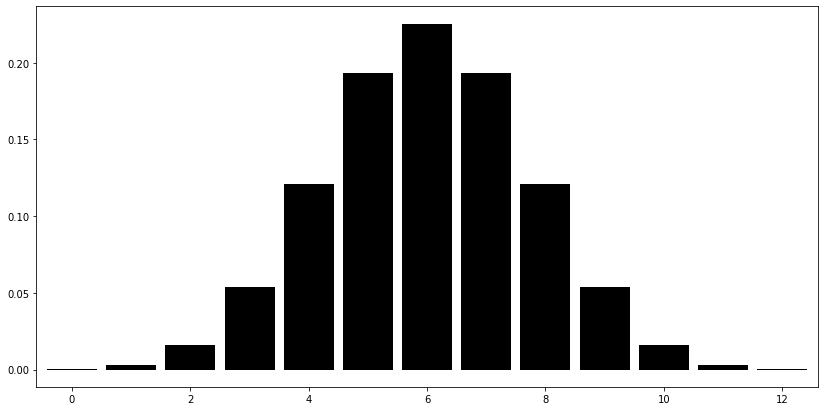

In [69]:
from scipy.stats import binom

plt.figure(figsize = (14,7))

pb = binom(n = len(sample), p = 0.5)
x = np.arange(0,13)
pmf = pb.pmf(x)

plt.vlines(x ,0, pb.pmf(x), colors='k', linestyles='-', lw=50)
plt.show()

In [108]:
pb.cdf(sum(np.array(sample) > 35)) > 0.05

True

Вывод: гипотеза о равенстве продолжительности урока 35 минутам не отвергается.

In [89]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue = sign_test(sample, mu0=35)
pvalue

1.0

#### Двувыборочный критерий знаков для связанных выборок

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ зависимы;

Проверяемая гипотеза: $H_{0} : P(X>Y) = 0.5 , H_{1} :  P(X>Y) <> 0.5 $ 

**Статистика:** $  \large T = \sum_{i=1}^n [X_i > Y_i]  $ ~  $Bin(0.5, n)$ при верной $H_0$


**Задача**

Курьеры передвигались на самокатах, затем им выдали велосипеды и записали среднее время, с которым они доставляли заказы до и после выдачи велосипедов. Проверить гипотезу о том, что на велосипедах курьеры передвигаются быстрее.

In [120]:
norm_rv1 = stats.norm(loc=35, scale = 5)

df = pd.DataFrame()
df['time_before'] = norm_rv1.rvs(size=20)
df['time_after'] = norm_rv1.rvs(size=20)
df.head()

,time_before,time_after
0,31.940017,40.440611
1,45.838954,39.332435
2,39.067040,30.505003
3,34.291148,33.077888
4,34.419364,32.941576


**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Будем использовать двувыборочный критерий знаков для связанных выборок и проверять одностороннюю гипотезу.

In [124]:
df['stat_M'] = np.where(df.time_before > df.time_after,1,0)
df.head(2)

,time_before,time_after,stat_M
0,31.940017,40.440611,0
1,45.838954,39.332435,1


In [127]:
pb = binom(n = df.shape[0], p = 0.5)
pb.cdf(df['stat_M'].sum())

0.41190147399902344

Вывод: нулевая гипотеза не отвергается.

In [128]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue = sign_test(df['time_before'] - df['time_after'])
pvalue

0.8238029479980469

#### Ранговые критерии

Знаковые критерии выбрасывают большую часть информации, вместо значений используют лишь бинарный вектор. 
Ранговые критерии сохраняют больше информации. 

**Ранг** - позиция элемента в вариационном ряду. 

Если встречаются несколько одинаковых значений,
им присваивается одинаковое значение ранга, равное
среднему арифметическому их порядковых номеров.

**Одновыборочный ранговый критерий Уилкоксона**

Наблюдаем: $X_1, X_2, …, X_n;$

Предполагаем: $X_i$  независимы;

Проверяемая гипотеза: $H_{0} : Med(X) = m_0 , H_{1} : Med(X) <> m_0 $ 

**Статистика:** $ \\ W = \sum_{i=1}^N rank(|X_i −m_0|)·sign(X_i −m_0)  $ ~ распределение табличное либо нормальное при большом числе наблюдений


При справедливости нулевой гипотезы каждый из рангов в выборке мог с одинаковой вероятностью реализоваться с любым знаком $sign(X_i −m_0)$: и с «+», и с «−». Таким образом, получается $2^n$ вариантов распределения знаков по рангам.

Перебирая все эти варианты, для каждого из них можно вычислить значение статистики.

**Задача**

Даны наблюдения времени выполнения контрольной работы по математике в школе. Проверить гипотезу о том, что время выполнения контрольной работы - 35 минут.

In [134]:
sample = np.array([29, 41, 39, 62, 46, 31, 29, 28, 30, 31, 45, 41])

**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Будем использовать одновыборочный критерий знаковых рангов Уилкоксона.

In [135]:
stats.wilcoxon(sample - 35)

WilcoxonResult(statistic=30.0, pvalue=0.5185546875)

Вывод: гипотеза о равенстве продолжительности урока 35 минутам не отвергается.

**Двувыборочный ранговый критерий Уилкоксона для связанных выборок**

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ зависимы;

Проверяемая гипотеза: $H_{0} : Med(X-Y) = 0 , H_{1} :  Med(X-Y) <> 0 $ 

**Статистика:** $  W = \sum_{i=1}^N rank(|X_{i} − Y_{i}|)·sign(X_{i} − Y_{i}) $ 

Аналогично одновыборочному критерию.

По данным задачи об изменении транспортного средства курьеров:

In [141]:
stats.wilcoxon(df['time_before'] , df['time_after'])

WilcoxonResult(statistic=81.0, pvalue=0.38837623596191406)

**Двувыборочный критерий Манна-Уитни для несвязанных выборок**

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ независимы;

Проверяемая гипотеза:
$\\ H_0: f_{X} (x) =  f_{Y} (y), $
 $H_1: f_{X} (x) =  f_{Y} (y + ∆),∆ <> 0 $

**Статистика:** $ \\ U = n_1n_2 + \frac{n_x(n_x+1)}{2} - T_x $ где определяем большую из двух ранговых сумм как $T_x$ соответствующую выборке с $n_x$ элементами.

Как считается коэффициент:
- в составленном едином ранжированном ряду общее количество рангов получится равным: n1 + n2.
- подсчитываем отдельно сумму рангов, пришедшихся на долю элементов первой выборки, и отдельно - на долю элементов второй выборки.
- далее рассчитываем сам коэффициент U.

In [146]:
sample_vel = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_sam = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]

In [156]:
from scipy import stats
dscrt_lst = np.random.randn(0,100)
dscrt_lst

array([], shape=(0, 100), dtype=float64)

In [147]:
stats.mannwhitneyu(sample_vel, sample_sam)

MannwhitneyuResult(statistic=307.5, pvalue=0.03576983135135158)

### 3. Множественные сравнения

Если исследуемых групп больше двух, то следует воспользоваться дисперсионным анализом. Однако дисперсионный анализ позволяет проверить лишь гипотезу о равенстве всех средних.
Но если гипотеза не подтверждается, нельзя узнать какая именно группа отличается от других.

Эффект множественных сравнений состоит в том, что при многократном применении критерия вероятность ошибочно найти различия там, где их нет возрастает и составляет 

$\\ P =  1 - (1 - \alpha) ^ k $ где k - число сравнений, $ \alpha $ - установленный уровень значимости.

**Поправка Бонферонни** заключается в том, что достигаемые уровни значимости гипотез сравниваются с уровнем значимости 
$ \Large \frac{\alpha} {k} .$

Поправка Бонферонни - один из самых консервативных методов. Также часто используют метод Холма, метод Бенджамини-Хохберга, которые не столь консервативны. 

**Задача**

Проверить гипотезу о том, что на личном транспорте добираться до университета быстрее, чем на общественном.

In [180]:
samokat = [34.2, 35.4, 53.2, 37.8, 31.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 31.6, 33.3, 32.9, 48.9, 39.2]

bike = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 18.8, 13.6, 34.4]

motorbike = [27.8, 38.1, 31.3, 36.6, 33.6, 43.3, 31.1, 31.1, 38.7, 44.9, 43.4,
       39.4, 47.9, 32.3, 28.4, 39.9, 38.5, 30.6, 29. , 36.6]

public_transport = [36.5, 42.1, 38. , 34.6, 38.5, 36.7, 29.6, 39.4, 32.4, 41.3, 30.1,
       29.5, 33.8, 40.6, 31.3, 31.1, 38.3, 38.6, 28.3, 33.8]

**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Нулевая гипотеза - время передвижения на публичном транспорте равно времени передвижения на личном, алтернативная - скорости не равны.
3. Будем использовать двувыборочный критерий Манна-Уитни, попарно сравнивая выборки.

In [188]:
pvals = []
for s in [samokat, bike, motorbike]:
    U, p = stats.mannwhitneyu(public_transport, s, alternative='greater')
    pvals.append(p)

In [189]:
pvals

[0.8575808095163361, 0.048099425470081544, 0.6375057571656346]

Простое попарное сравнение показало, что можем отвергнуть гипотезу об одинаковой скорости передвижения на велосипеде и публичном транспорте, исопльзуем поправку Бонферрони.

In [193]:
from statsmodels.sandbox.stats.multicomp import multipletests
hyp_rej, corrected_pvals , _ , _ = multipletests(pvals, alpha=0.05, method='bonferroni')

In [194]:
hyp_rej

array([False, False, False])

Вывод: с учетом поправки Бонферрони не можем отклонить ни одну гипотезу о том, что время передвижения на личном транспорте меньше времени передвижения на публичном в пользу альтернативной.

### 4. Корреляция

При работе с данными нас часто интересует не предсказание значения одной переменной по значению другой, а просто характеристика тесноты (силы) связи между ними, при этом выраженная одним числом. Эта характеристика называется **коэффициентом корреляции**.

**Корреляция Пирсона**

Корреляция Пирсона — это мера силы **линейной** взаимосвязи между двумя случайными величинами X и Y. Он требует нормальности распределения и очень чувствителен к выбросам.

$ \Large r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$

Коэффициент корреляции принимает значения от –1 до +1. Чем теснее связь, тем больше абсолютная величина коэффициента корреляции. Знак показывает направление связи. При r > 0 говорят о прямой корреляции (с увеличением одной переменной другая также возрастает), при r < 0 — об обратной (с увеличением одной переменной другая уменьшается).

<img width = '1000px' src="images/corp4.png">

Пример - посчитать, есть ли связь между дневными продажами пиццы и ценой продажи, которая была установлена в этот день. 

In [209]:
daily_prices = [912, 958, 979, 530, 750, 531, 412, 985, 477, 691, 724, 352, 488,
       604, 736, 715, 406, 688, 357, 242, 454, 851, 587, 622, 966, 991,
       784, 687, 998, 601, 565]
daily_sales = [ 32,  25,  11,  33,  16,  54,  46,  20,  49,  31,  29,  67,  33,
        39,  16,  17,  45,  35,  77, 108,  35,  29,  20,  46,  26,  16,
        19,  16,  19,  28,  22,  ]

In [ ]:
from scipy.stats import pearsonr
corr, pval = pearsonr(sample_1, sample_2)

In [214]:
from scipy.stats import pearsonr
corr, _ = pearsonr(daily_prices, daily_sales)
corr

-0.7428621943629039

Но что говорит полученное значение, как интерпретировать полученный коэффицент? 

Для ответа на вопрос по аналогии существует критерий (статистический критерий Стьюдента) и соответвующая статистика:

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ нормально распределены, линейно зависимы;

Проверяемая гипотеза:
$ H_0: r = 0, $
 $H_1: r <> 0 $

**Статистика:** $ \large t = \frac{r_{X_1X_2}\sqrt{n-2}}{\sqrt{1 - r_{X_1X_2}^2}} $

In [216]:
corr, pval = pearsonr(daily_prices, daily_sales)
pval

1.702377210853357e-06

Можем сделать вывод о наличии статистически значимой связи между ценой продажи и обьемом продаж.

**Корреляция Спирмена**

Коэффициент корреляции Спирмена — это мера силы монотонной взаимосвязи между двумя случайными величинами, он равен коэффициенту корреляции Пирсона между рангами наблюдений.

Для расчета коэффициента нужно упорядочить данные по возрастанию и заменить реальные значения их рангами. Рангом значения называется его номер в упорядоченном ряду.Затем, беря вместо самих значений их ранги, рассчитывают обычный коэффициент корреляции Пирсона.

$\Large \rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}} $, где d — разность рангов для каждого члена выборки.

<img width = '900px' src="images/cors4.png">

Значимость коэффициента определяется с помощью перестановочного критерия - по аналогии, как и с непараметрическими критериями.

In [248]:
from scipy.stats import spearmanr
r = spearmanr(daily_prices, daily_sales)
r

SpearmanrResult(correlation=-0.7600979224117517, pvalue=7.033574706881643e-07)

**Корреялция Мэтьюса**

Коэффициент корреляции Мэтьюса — это мера силы взаимосвязи между двумя бинарными переменными. 

$ \Large MCC = \frac{ad-bc}{\sqrt{(a+b)(a+c)(b+d)(c+d)}} $

<img width = '500px' src="images/mat.png">

Статистика для проверки значимости критерия:

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Проверяемая гипотеза:
$ H_0: MCC = 0, $
 $H_1: MCC <> 0 $

**Статистика:**  $\chi^2  = nMCC^2$

Используется для оценки качества бинарной классификации, дают более стабильное оценку, если размеры классов сильно различаются, в отличие от F1, ROC-AUC.

In [8]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
# confusion_matrix(y_true, y_pred)
actual = np.repeat([1, 0, 1, 0], repeats=[90, 1, 5, 4])
pred = np.repeat([1, 0, 0, 1], repeats=[90, 1, 5, 4])

tn, fp, fn, tp   = confusion_matrix(actual, pred).ravel()

In [9]:
(tn, fp, fn, tp)

(1, 4, 5, 90)

In [10]:
f1_score(actual, pred)

0.9523809523809523

In [11]:
matthews_corrcoef(actual, pred)

0.13524203070138519

На оценку F1 сильно влияет то, какой класс помечен как положительный, при этом MCC менее интерпретируема.

### 5. Библиотека statsmodels и регрессия

In [13]:
orders_info = pd.read_excel('files/oct_2018_Samara_pizza.xlsx')
orders_info.head()

,Price,Orders
0,912,32
1,958,25
2,979,11
3,530,33
4,750,16


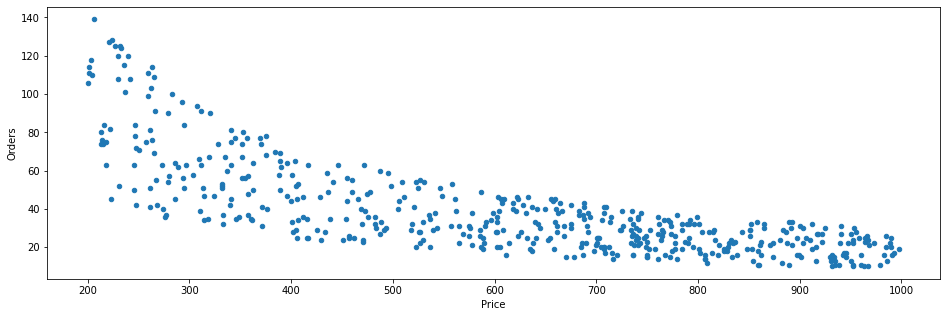

In [15]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
plt.show()

**Задача.** На платформе появляется новый ресторан и хочет продавать Пиццу по определенной цене. Сколько у данного ресторана будет продаж в день?

In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Orders~Price',data=orders_info)
fitted = model.fit()

In [23]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Orders   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     687.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           7.12e-96
Time:                        20:26:38   Log-Likelihood:                -2087.4
No. Observations:                 500   AIC:                             4179.
Df Residuals:                     498   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9893      1.999     44.010      0.0

In [17]:
fitted.params

Intercept    87.989346
Price        -0.080659
dtype: float64

In [18]:
orders_info['predicted'] = fitted.params[0] + fitted.params[1]*orders_info['Price']

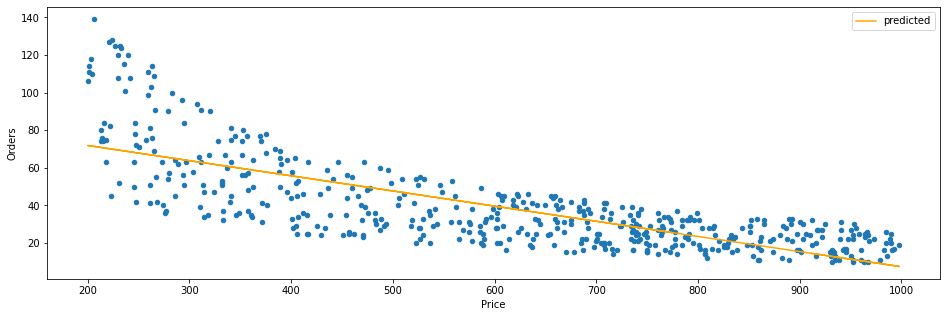

In [20]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
orders_info.plot.line('Price','predicted',ax = ax1,color = 'orange')
plt.show()

 **Коэффициент детерминации**

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводы том, насколько хорошо данная модель решает задачу. Вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации.

### $ MSE = \frac{\sum_{i=1}^n(\hat{y_i}-y)^2}{n} $ 

Попробуем нормализовать ошибку:

$ TSS =  ESS + RSS $

$TSS = \sum_{i=1}^n(y_i-\overline{y})^2 $ - разброс относительно своего среднего (~ ошибка наивного предсказания без X) 

$ESS = \sum_{i=1}^n(\hat{y_i}-\overline{y})^2 $ - объясненная сумма квадратов,сумма квадратов отклонений среднего от предсказанных y.

$RSS = \sum_{i=1}^n(\hat{y_i}-y_i)^2 $ - остаточная сумма квадратов.

$\Large R^2 = \frac{ESS}{TSS}$ - **коэффициент детерминации**, доля объясненной дисперсии отклика во всей дисперсии отклика.

In [29]:
fitted.rsquared

0.5800274817271207

Основная проблема применения коэффициента детерминации заключается в том, что его значение увеличивается от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют. 

Для того, чтобы была возможность сравнивать модели с разным числом признаков так, чтобы число регрессоров (признаков) не влияло на статистику  обычно используется **скорректированный коэффициент детерминации**.

$\Large R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k - 1}$,

n - кол-во наблюдений,

k - кол-во независимых переменных

In [30]:
fitted.rsquared_adj

0.5791841634173358

**Критерий Фишера**

Требуется проверить гипотезу о том, что все признаки X для предсказания y не нужны, то есть лучшее предсказание для y — это константа. 

Проверяемая гипотеза: $H_{0} : \alpha_1 = \alpha_2 =  ... = \alpha_n = 0 , H_{1} : H_{0} \text { гипотеза  неверна} $ 

**Статистика:** $  \Large F =  \frac{R^2/k}{(1 - R^2)/(n-k-1)} $

In [31]:
fitted.fvalue

687.7918752588997

In [32]:
fitted.f_pvalue

7.124488003451089e-96

**Метод максимального правдоподобия**

**Метод максимального правдоподобия** -- метод поиска модели, наилучшим в каком-то смысле образом описывающей обучающую выборку, полученную с некоторым неизвестным распределением.

Откуда такая идея – искать значение параметра, при котором функция правдоподобия достигает максимума? 
Идея проистекает из представления о том, что выборка – это **единственный источник знания** о генеральной совокупности, доступный нам. Все, что мы знаем о генеральной совокупности, содержится в выборке. Поэтому нам
ничего иного не остается, как сказать, что выборка – это наиболее точное отражение
генеральной совокупности, доступное нам. А раз так, мы должны полностью положиться
на выборку и понять, каков должен быть искомый параметр, чтобы появление именно
такой выборки было наиболее вероятным. 

Центральная идея ММП – это поиск
такого значения параметра генеральной совокупности, при котором имеющаяся
выборка становится наиболее вероятной.

Если предположить, что каждое из наблюдений из тренировочного датасета немного неточно описывают исходный датасет (генеральную совокупность) - каждое наблюдение в отдельности - это случайная величина, взятая из нормального распредления. 

Цель линейной регрессии - воссоздать исходную модель генеральной совокупности с учетом неопределенности в распредлениях каждого из наблюдений.  

<img width = '600' src="images/ll.png">

Правдоподобие - произведение вероятностей каждого из наблюдений.

<img width = '600' src="images/eq1.png">

После логарифмирования и упрощения уравнение в векторной форме выглядит следующим образом.

<img width = '600' src="images/eq2.png">

**Информационные критерии**

**Информационный критерий** — мера относительного качества моделей, учитывающая степень «подгонки» модели под данные с корректировкой (штрафом) на используемое количество оцениваемых параметров. То есть критерии основаны на неком компромиссе между точностью и сложностью модели. 

<img width = '600' src="images/inf_.png">

$ AIC = 2p - 2log(L)$

$ BIC = log(n) p - 2log(L) $

Чем меньше значение критерия, тем лучше модель.

**Критерий Стьюдента**

Проверяемая гипотеза: $H_{0} : \alpha_i = 0 , H_{1} : \alpha_i <> 0 $ 

**Статистика:** $  \Large T =  \frac{a_i}{\sqrt{\frac{RSS}{n-k-1}(XX^{t})^{-1}_{ii}}} $

Гипотеза о равенстве нулю коэффициента **a** означает, что признак x не влияет на отклик y.

In [37]:
fitted.tvalues

Intercept    44.009606
Price       -26.225786
dtype: float64

In [38]:
fitted.pvalues

Intercept    9.578626e-174
Price         7.124488e-96
dtype: float64

**Прочие индикаторы линейной регрессии**

Скос и эксцесс.

<img width = '450' src="images/skK.gif">

**Skew/Kurtosis** - меры скоса и эксцесса, ожидается значение ближе к 0.

**Omnibus/Prob(Omnibus)** - тест на скосс и эксцесс остатков модели линейной регрессии, Prob(Omnibus) ближе к 1 говорит о нормальности остатков модели.

**Durbin-Watson** - тест на автокорреляцию между остатками регрессионнной модели, наилучший показатель - значения между 1 и 2.

**Jarque-Bera (JB)/Prob(JB)** - тест по аналогии с тестом Omnibus.

**Condition Number** - тест на чувствительность результата модели к входным данным, например, в случае мультиколлинеарности (наличие зависимости между объясняющими переменными), малейшие изменения входных параметров могут сильно повлиять на результат модели, ожидается значение меньшее 30.

Почему в нашей модели такой большой Condition Number, если в ней всего лишь 1 переменная (Цена) ?